In [1]:
# !pip install scikit-image
from skimage import io
import skimage
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.filters import try_all_threshold
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = io.imread("images/wound_assay.jpeg")
gray_image = skimage.color.rgb2gray(img)

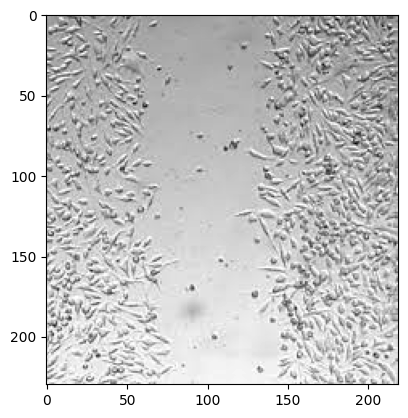

In [3]:
plt.imshow(gray_image, cmap="gray")

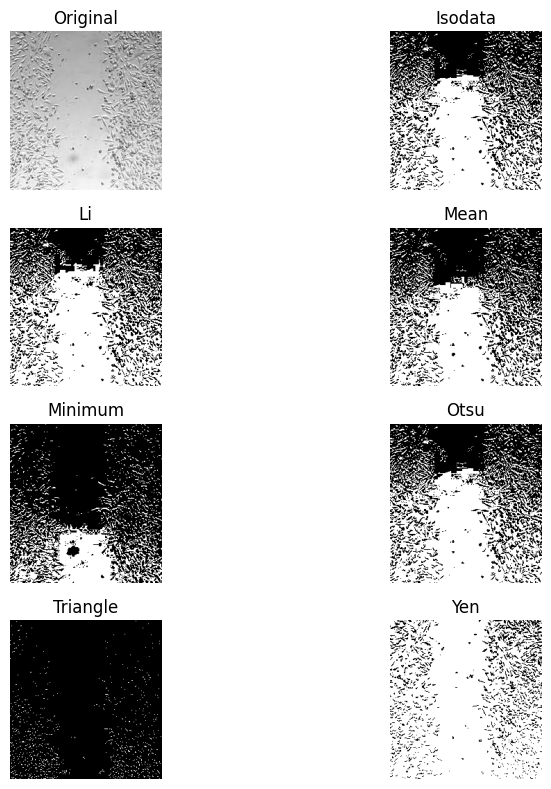

In [6]:
fig, ax = try_all_threshold(gray_image, figsize=(10, 8), verbose=False)
plt.show()

###### Please notice, that skimage.morphology.disk is a "2D structuring element", which can only be used with a "2D image", 
###### i.e. a grayscale image.



In [10]:
entropy_img = entropy(gray_image, footprint=disk(15))
entropy_img.shape

/tmp/ipykernel_4302/2091909777.py:1: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  entropy_img = entropy(gray_image, footprint=disk(15))


(230, 219)

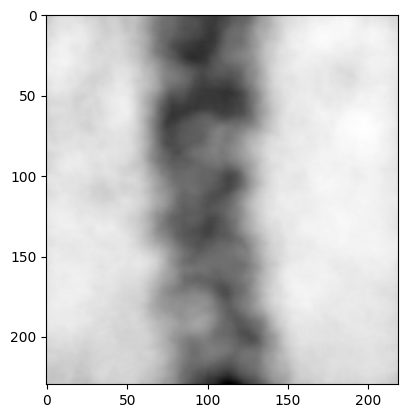

In [9]:
plt.imshow(entropy_img, cmap="gray")

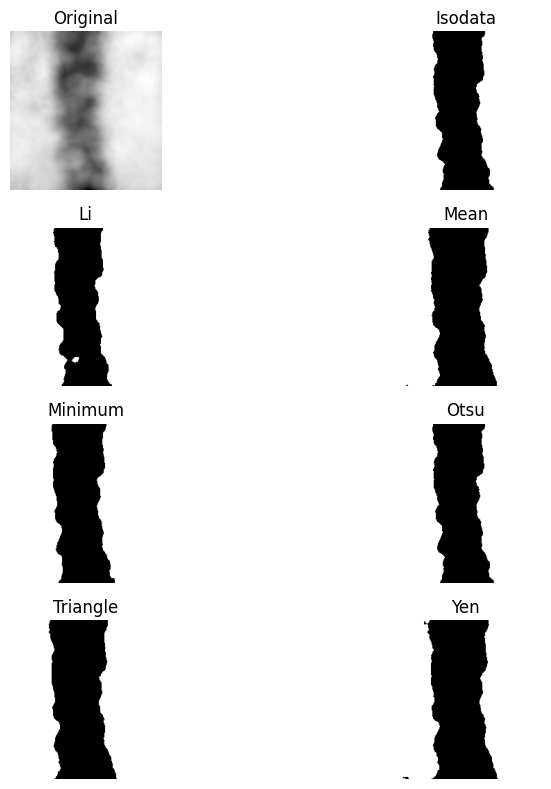

In [11]:
fig, ax = try_all_threshold(entropy_img, figsize=(10, 8), verbose=False)
plt.show()

In [16]:
from skimage.filters import threshold_otsu
thresh = threshold_otsu(entropy_img)
print("Thresh:",thresh)
print(entropy_img)

Thresh: 5.588372960445864
[[6.27161178 6.28198293 6.27450173 ... 6.49275137 6.45482467 6.44394922]
 [6.27236755 6.26883543 6.29023311 ... 6.52574249 6.50349047 6.46088777]
 [6.26280831 6.29173186 6.31970234 ... 6.54140483 6.53051435 6.51251089]
 ...
 [6.19900418 6.21438871 6.18439443 ... 6.2708658  6.22010117 6.19214959]
 [6.18390515 6.2088792  6.19235973 ... 6.23946762 6.22246215 6.17501827]
 [6.15422825 6.16720263 6.17905628 ... 6.24889857 6.21994605 6.17409977]]


In [17]:
binary_img = entropy_img <= thresh
binary_img

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

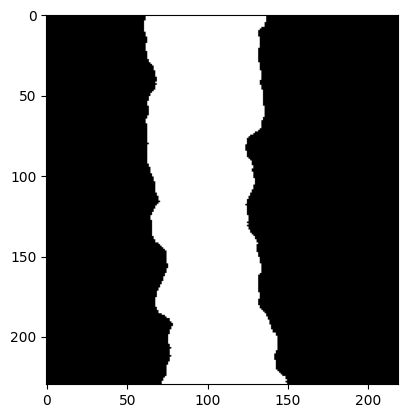

In [18]:
plt.imshow(binary_img, cmap="gray")

In [24]:
print("Wounded area:", np.sum(binary_img==1))
print("Wounded area(%):", (np.sum(binary_img==1)*100)/(np.sum(binary_img==1)+np.sum(binary_img==0)))
print("Normal area:", np.sum(binary_img==0))

Wounded area: 14941
Wounded area(%): 29.662497518364106
Normal area: 35429


In [25]:
binary_img.shape

(230, 219)

In [26]:
img.shape

(230, 219, 3)

In [27]:
binary_img.shape[0]*binary_img.shape[1]

50370

In [28]:
14941+35429

50370